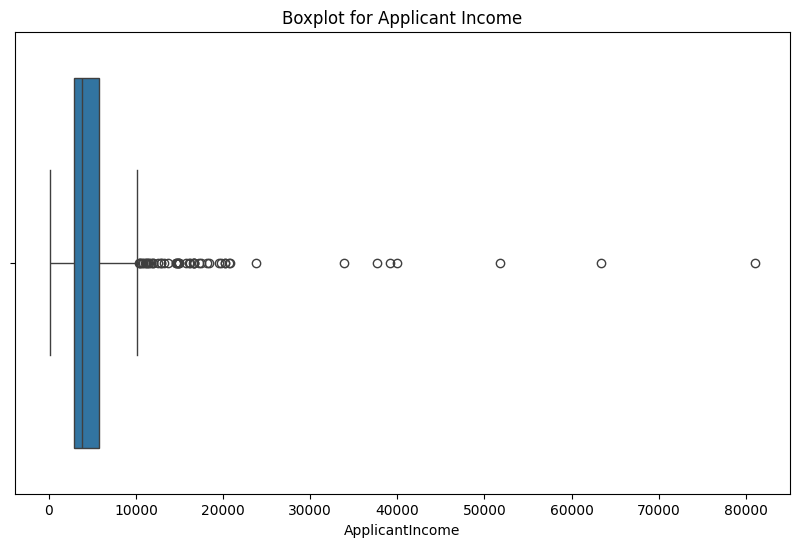

Number of outliers in 'ApplicantIncome': 50
Number of data points after removing outliers: 564


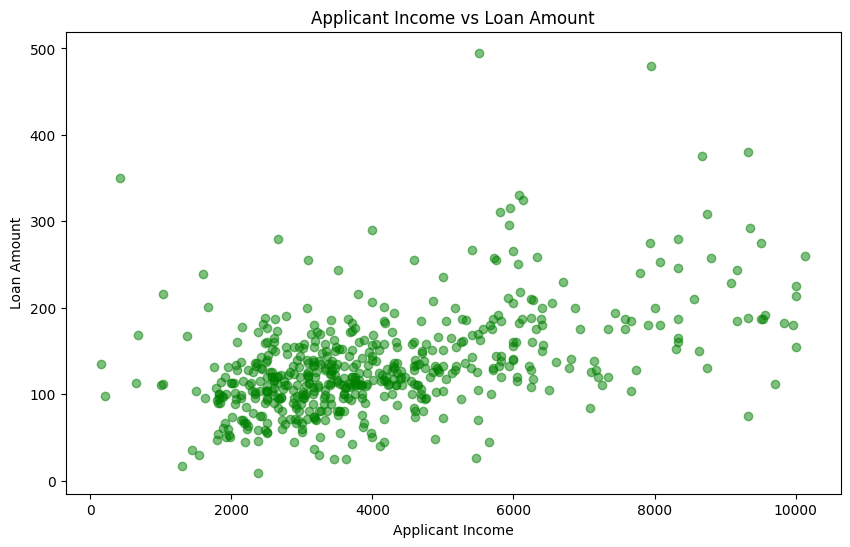

SVM on Loan Prediction's Accuracy: 0.6504065040650406
SVM Confusion Matrix:
 [[ 0 43]
 [ 0 80]]
Decision Tree on Loan Prediction's Accuracy: 0.7073170731707317
Decision Tree Confusion Matrix:
 [[18 25]
 [11 69]]
Logistic Regression on Loan Prediction's Accuracy: 0.7886178861788617
Logistic Regression Confusion Matrix:
 [[18 25]
 [ 1 79]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced visualization
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
loan_data = pd.read_csv('/content/loan_data.csv')

# 'Loan_Status' is the target variable
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

# Handle categorical features using one-hot encoding
X = pd.get_dummies(X)

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Detect Outliers using Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=loan_data['ApplicantIncome'])
plt.title('Boxplot for Applicant Income')
plt.show()

# Outlier Detection using Interquartile Range (IQR)
if 'ApplicantIncome' in loan_data.columns:
    Q1 = loan_data['ApplicantIncome'].quantile(0.25)
    Q3 = loan_data['ApplicantIncome'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = loan_data[(loan_data['ApplicantIncome'] < lower_bound) | (loan_data['ApplicantIncome'] > upper_bound)]
    print(f"Number of outliers in 'ApplicantIncome': {len(outliers)}")

    # Remove outliers from the dataset
    loan_data = loan_data[(loan_data['ApplicantIncome'] >= lower_bound) & (loan_data['ApplicantIncome'] <= upper_bound)]
    print(f"Number of data points after removing outliers: {loan_data.shape[0]}")

# Visualize the relationship between two features using a scatter plot
if 'ApplicantIncome' in loan_data.columns and 'LoanAmount' in loan_data.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(loan_data['ApplicantIncome'], loan_data['LoanAmount'], color='green', alpha=0.5)
    plt.title('Applicant Income vs Loan Amount')
    plt.xlabel('Applicant Income')
    plt.ylabel('Loan Amount')
    plt.show()

# Scale the features using StandardScaler for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SVM Model ###
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(f"SVM on Loan Prediction's Accuracy: {accuracy_svm}")
print("SVM Confusion Matrix:\n", conf_matrix_svm)

### Decision Tree Model ###
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(f"Decision Tree on Loan Prediction's Accuracy: {accuracy_tree}")
print("Decision Tree Confusion Matrix:\n", conf_matrix_tree)

### Logistic Regression Model ###
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print(f"Logistic Regression on Loan Prediction's Accuracy: {accuracy_logistic}")
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logistic)
